In [11]:
import numpy as np

In [203]:
N = 1024

In [204]:
A = np.random.randint(-20, 20, (N, N))

with open('A_data', 'w+') as f:
    for x in A.flatten():
        f.write(str(x) + " ")

In [205]:
B = np.random.randint(-20, 20, (N, N))

with open('B_data', 'w+') as f:
    for x in B.flatten():
        f.write(str(x) + " ")

In [109]:
with open('C_data', 'r') as f:
    C_data = f.readline().split(' ')
    C_data = [int(x) for x in C_data if len(x) > 0]
    C = np.array(C_data).reshape((N, N))

In [110]:
(np.matmul(A, B) == C).all()

True

In [126]:
N = 2048

In [127]:
P = np.random.randint(-20, 20, (N, N))

with open('P_data', 'w+') as f:
    for x in P.flatten():
        f.write(str(x) + " ")

In [109]:
with open('P_transposed', 'r') as f:
    P_T_data = f.readline().split(' ')
    P_T_data = [int(x) for x in P_T_data if len(x) > 0]
    P_T = np.array(P_T_data).reshape((N, N))

In [110]:
(P.T == P_T).all()

True

In [ ]:
N = 1024

In [43]:
W = np.random.randint(1, 30, (N, N))
for i in range(N):
    W[i, i] = 0

with open('W_data', 'w+') as f:
    for x in W.flatten():
        f.write(str(x) + " ")

In [58]:
with open('SP_actual', 'r') as f:
    SP = f.readline().split(' ')
    SP = [int(x) for x in SP if len(x) > 0]
    SP = np.array(SP).reshape((N, N))

In [59]:
with open('SP_data', 'r') as f:
    SP_read = f.readline().split(' ')
    SP_read = [int(x) for x in SP_read if len(x) > 0]
    SP_read = np.array(SP_read).reshape((N, N))

In [61]:
SP_read

array([[0, 3, 2, ..., 3, 2, 2],
       [1, 0, 2, ..., 1, 2, 2],
       [3, 3, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 0, 2, 2],
       [3, 2, 2, ..., 2, 0, 3],
       [2, 3, 1, ..., 2, 2, 0]])

In [60]:
(SP == SP_read).all()

True

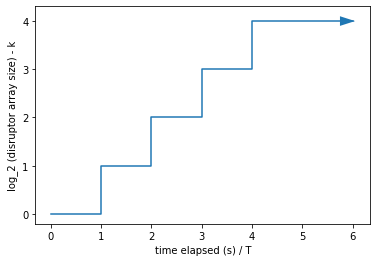

In [377]:
plt.step([0, 1, 2, 3, 4, 6], [0, 1, 2, 3, 4, 4], where='post')
plt.arrow(6, 4, 0.05, 0, lw=0, length_includes_head=True, head_width=0.2, color='C0')
plt.xlabel('time elapsed (s) / T')
plt.ylabel('log_2 (disruptor array size) - k')
plt.show()

In [238]:
import matplotlib.pyplot as plt
import numpy as np

In [286]:
# cache_lst = range(12, 23, 2)
cache_lst = range(6)
algo_lst = ['naive', 'transposed', 'recursive']
i_list = range(3)

In [345]:
data = dict()
usr_time_data = dict()
wall_time_data = dict()

for cache in cache_lst:
    for alg in algo_lst:
        for i in i_list:
            data[cache, alg, i] = np.nan
            usr_time_data[cache, alg, i] = np.nan
            wall_time_data[cache, alg, i] = np.nan
            try:
                with open(f'./logs_matmul/{alg}_{cache}_{i}', 'r') as f:
                    for ln in f.readlines():
                        if ln.startswith('\tMajor (requiring I/O) page faults:'):
                            x = int(ln.split(':')[1].strip())
                            data[cache, alg, i] = x
                        elif ln.startswith('\tUser time (seconds):'):
                            x = float(ln.split(':')[1].strip())
                            usr_time_data[cache, alg, i] = x
                        elif ln.startswith('\tSystem time (seconds):'):
                            x = float(ln.split(':')[1].strip())
                            wall_time_data[cache, alg, i] = x
            except FileNotFoundError:
                pass

(0.0, 1200000.0)

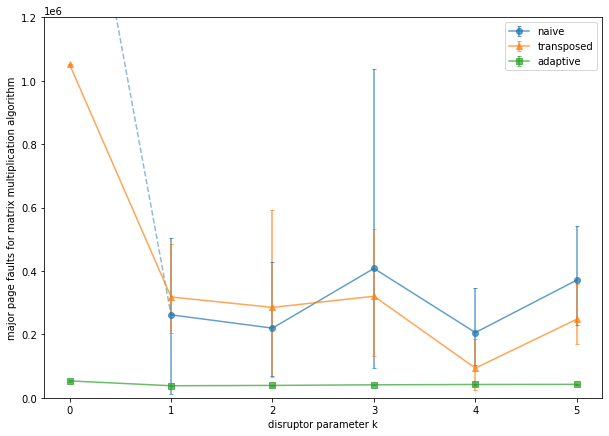

In [355]:
plt.figure(figsize=(10, 7))

for m, alg in zip(['o', '^', 's'], algo_lst):
    ds = [[data[cache, alg, i] for i in i_list] for cache in cache_lst]
    plt.errorbar(cache_lst, [np.mean(d) for d in ds], 
                 yerr=[[np.mean(d) - min(d) for d in ds], [max(d) - np.mean(d) for d in ds]], 
                 marker=m, label=alg if alg is not 'recursive' else 'adaptive', alpha=0.7, capsize=2)
    if m == 'o':
        naive_data = ds
plt.plot([0, 1], [2e6, np.mean(naive_data[1])], '--', color='C0', alpha=0.5)

plt.xlabel('disruptor parameter T')
plt.ylabel('major page faults for matrix multiplication algorithm')
plt.legend()
plt.ylim(0, 1.2e6)

(0.0, 120.0)

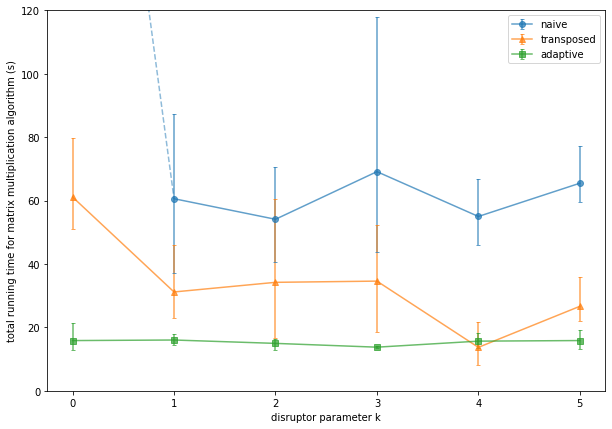

In [352]:
plt.figure(figsize=(10, 7))

for m, alg in zip(['o', '^', 's'], algo_lst):
    ds = [[usr_time_data[cache, alg, i] + wall_time_data[cache, alg, i] for i in i_list] for cache in cache_lst]
    plt.errorbar(cache_lst, [np.mean(d) for d in ds], 
                 yerr=[[np.mean(d) - min(d) for d in ds], [max(d) - np.mean(d) for d in ds]], 
                 marker=m, label=alg if alg is not 'recursive' else 'adaptive', alpha=0.7, capsize=2)
    if m == 'o':
        naive_data = ds
plt.plot([0, 1], [60*5, np.mean(naive_data[1])], '--', color='C0', alpha=0.5)
    
plt.xlabel('disruptor parameter T')
plt.ylabel('total running time for matrix multiplication algorithm (s)')
plt.legend()
plt.ylim(0, 120)

In [425]:
data = dict()
usr_time_data = dict()
wall_time_data = dict()

for cache in cache_lst:
    for alg in algo_lst:
        for i in i_list:
            data[cache, alg, i] = np.nan
            usr_time_data[cache, alg, i] = np.nan
            wall_time_data[cache, alg, i] = np.nan
            try:
                with open(f'./logs_fw/{alg}_{cache}_{i}', 'r') as f:
                    for ln in f.readlines():
                        if ln.startswith('\tMajor (requiring I/O) page faults:'):
                            x = int(ln.split(':')[1].strip())
                            data[cache, alg, i] = x
                        elif ln.startswith('\tUser time (seconds):'):
                            x = float(ln.split(':')[1].strip())
                            usr_time_data[cache, alg, i] = x
                        elif ln.startswith('\tSystem time (seconds):'):
                            x = float(ln.split(':')[1].strip())
                            wall_time_data[cache, alg, i] = x
            except FileNotFoundError:
                pass

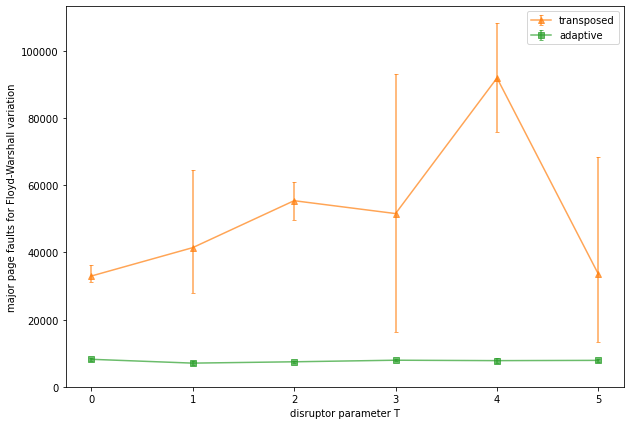

In [429]:
plt.figure(figsize=(10, 7))

for m, alg in zip(['o', '^', 's'], algo_lst):
    ds = [[data[cache, alg, i] for i in i_list] for cache in cache_lst]
    if m == 'o':
        alg = None
    plt.errorbar(cache_lst, [np.mean(d) for d in ds], 
                 yerr=[[np.mean(d) - min(d) for d in ds], [max(d) - np.mean(d) for d in ds]], 
                 marker=m, label=alg if alg is not 'recursive' else 'adaptive', alpha=0.7, capsize=2)
# plt.yscale('log')
plt.ylim(0, None)
plt.xlabel('disruptor parameter T')
plt.ylabel('major page faults for Floyd-Warshall variation')
plt.legend()

(0.0, 21.2505)

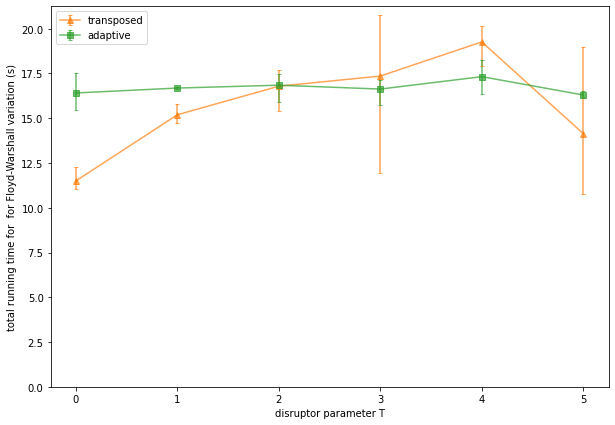

In [427]:
plt.figure(figsize=(10, 7))

for m, alg in zip(['o', '^', 's'], algo_lst):
    ds = [[usr_time_data[cache, alg, i] + wall_time_data[cache, alg, i] for i in i_list] for cache in cache_lst]
    if m == 'o':
        alg = None
    plt.errorbar(cache_lst, [np.mean(d) for d in ds], 
                 yerr=[[np.mean(d) - min(d) for d in ds], [max(d) - np.mean(d) for d in ds]], 
                 marker=m, label=alg if alg is not 'recursive' else 'adaptive', alpha=0.7, capsize=2)
plt.xlabel('disruptor parameter T')
plt.ylabel('total running time for  for Floyd-Warshall variation (s)')
plt.legend()
plt.ylim(0, None)